In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('insurance.csv')

# EDA

In [24]:
print(f'Rows:{df.shape[0]} and Columns:{df.shape[1]}')

Rows:1338 and Columns:7


In [5]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
# checking null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

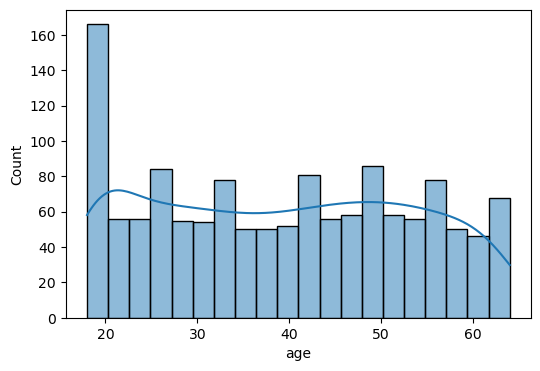

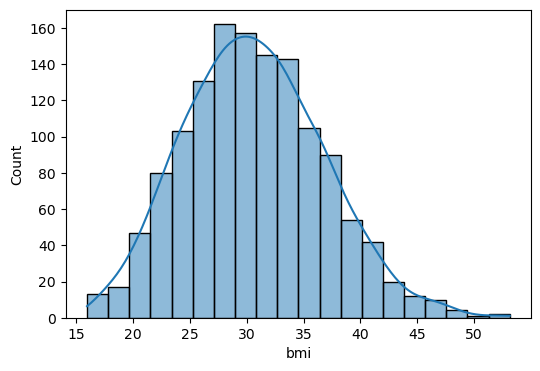

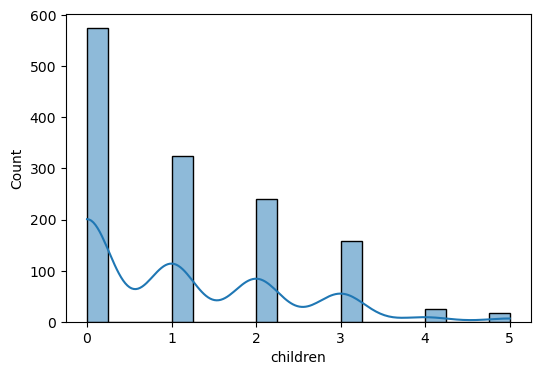

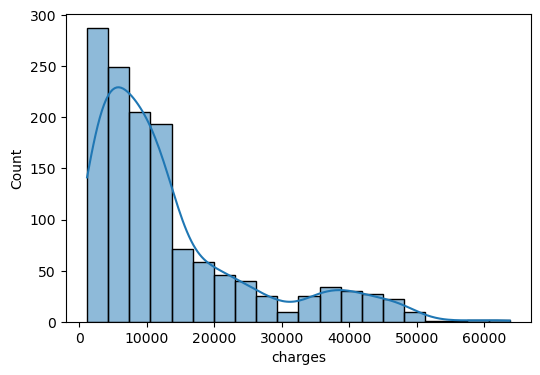

In [37]:
# analyzing distribution using histogram
numeric_columns = ['age', 'bmi', 'children', 'charges']
for i in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[i], kde = True, bins= 20)

<Axes: xlabel='children', ylabel='count'>

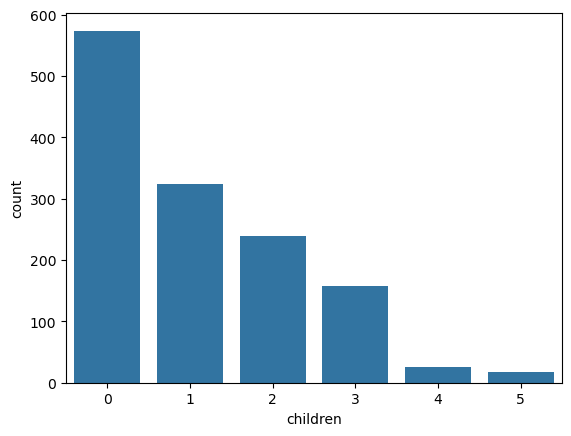

In [40]:
sns.countplot(x = df['children']) 

<Axes: xlabel='sex', ylabel='count'>

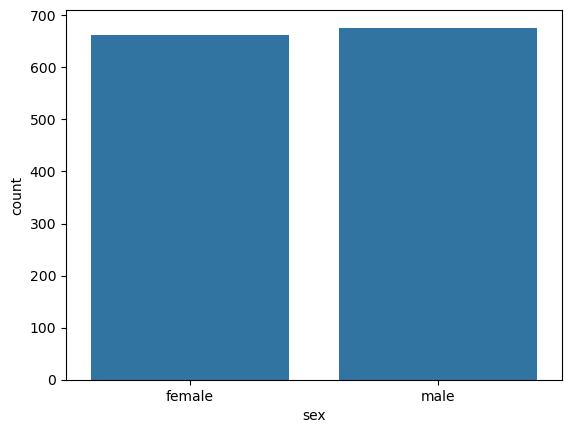

In [42]:
# gender analyzing
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

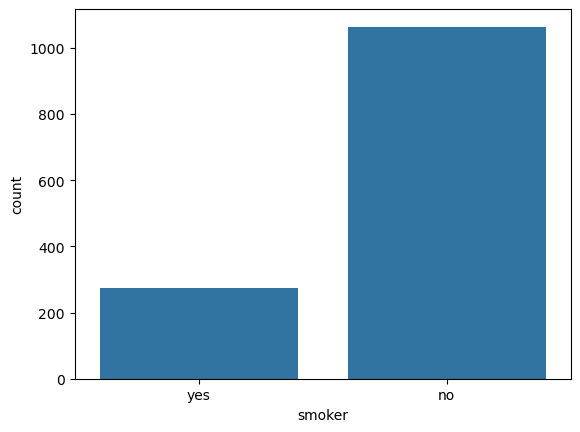

In [44]:
# smoker analysing
sns.countplot(x = df['smoker'])

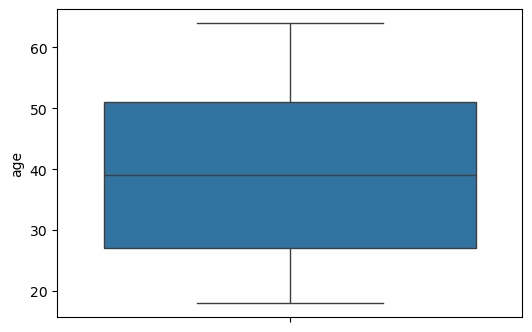

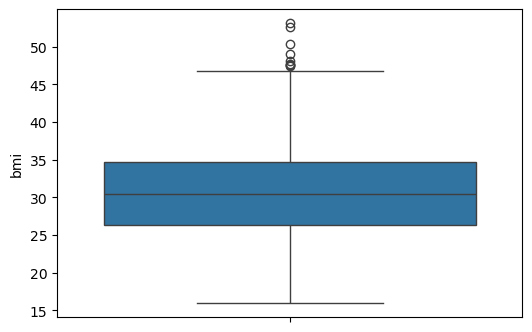

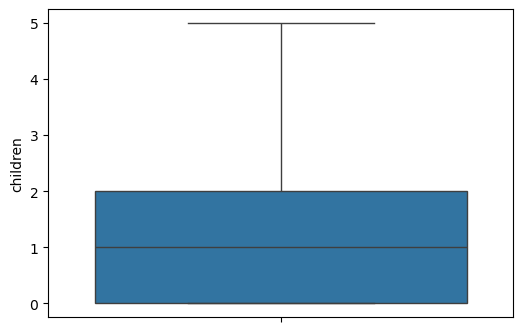

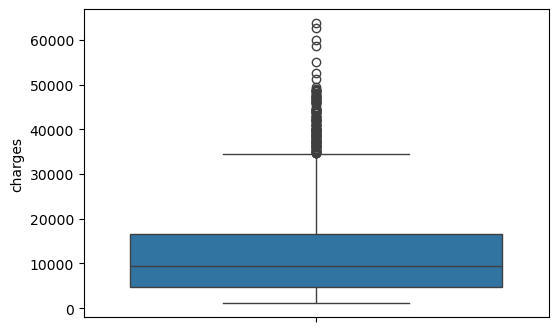

In [46]:
# identify outliers
for i in numeric_columns:
    plt.figure(figsize = (6, 4))
    sns.boxplot(y = df[i])

<Axes: >

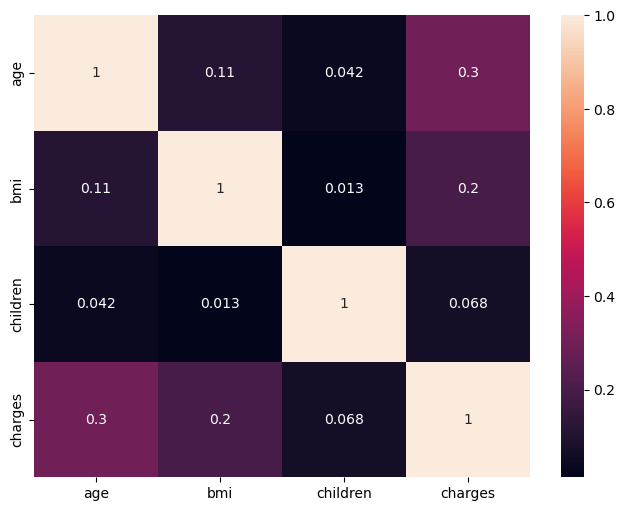

In [49]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data cleaning and Preprocessing

In [51]:
df_cleaned = df.copy()

In [52]:
df_cleand.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [61]:
df_cleaned.shape

(1337, 7)

In [59]:
df_cleaned.drop_duplicates(inplace=True)

In [81]:
df_cleaned.isnull().sum()

np.int64(0)

In [80]:
df_cleaned.dtypes

dtype('int64')

In [68]:
# label encoding on 'sex'
df_cleaned['sex'] = df_cleaned['sex'].map({'male':0, 'female':1})

In [79]:
df_cleaned.head(3)

0    1
1    0
2    0
Name: smoker, dtype: int64

In [74]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [75]:
# label encoding on 'smoker'
df_cleaned = df_cleaned['smoker'].map({'no':0, 'yes':1})

In [78]:
df_cleaned

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1337, dtype: int64